In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Dataset Shape:
(891, 13)

Data Types:
PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
AgeBucket      category
dtype: object

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBucket      177
dtype: int64

Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Age Bucket:
AgeBucket
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.400000
Senior         0.22727

/tmp/ipython-input-1765848637.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby("AgeBucket")["Survived"].mean()


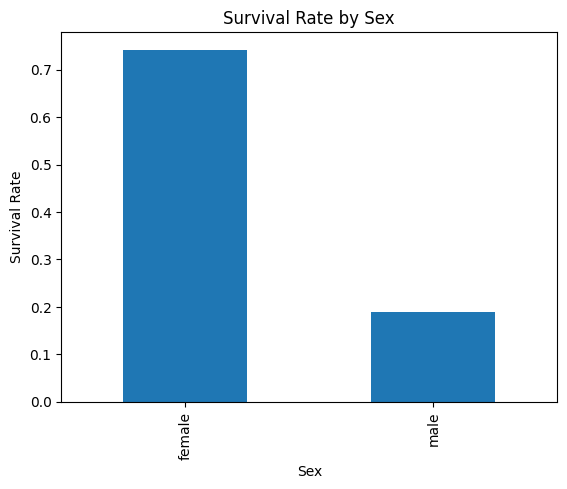

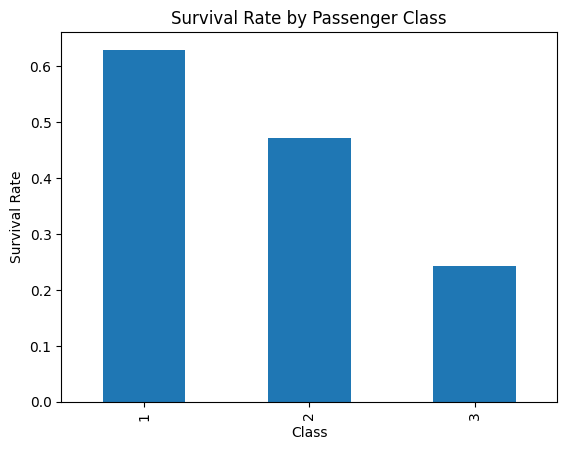

<Figure size 640x480 with 0 Axes>

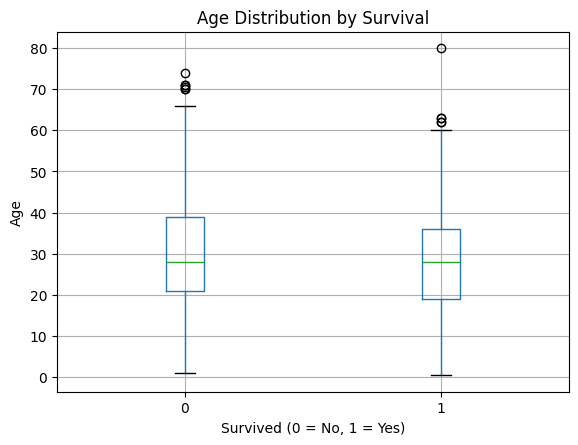


INSIGHTS:
- Females had a significantly higher survival rate than males.
- 1st class passengers survived more than 2nd and 3rd class.
- Children and young adults had better survival chances.
- Older passengers had lower survival probability.
- Age and Cabin have many missing values and need preprocessing.


In [6]:
# 2. Inspect data
print("Dataset Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# 3. Survival rate by Sex
survival_by_sex = df.groupby("Sex")["Survived"].mean()
print("\nSurvival Rate by Sex:")
print(survival_by_sex)

# 4. Survival rate by Passenger Class
survival_by_class = df.groupby("Pclass")["Survived"].mean()
print("\nSurvival Rate by Class:")
print(survival_by_class)

# 5. Create Age Buckets
df["AgeBucket"] = pd.cut(
    df["Age"],
    bins=[0, 12, 18, 35, 60, 80],
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"]
)

survival_by_age = df.groupby("AgeBucket")["Survived"].mean()
print("\nSurvival Rate by Age Bucket:")
print(survival_by_age)

# 6. Visualization: Survival by Sex
plt.figure()
survival_by_sex.plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()

# 7. Visualization: Survival by Class
plt.figure()
survival_by_class.plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Class")
plt.show()

# 8. Visualization: Age vs Survival (Boxplot)
plt.figure()
df.boxplot(column="Age", by="Survived")
plt.title("Age Distribution by Survival")
plt.suptitle("")
plt.ylabel("Age")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

# 9. Short Insight Report
print("\nINSIGHTS:")
print("- Females had a significantly higher survival rate than males.")
print("- 1st class passengers survived more than 2nd and 3rd class.")
print("- Children and young adults had better survival chances.")
print("- Older passengers had lower survival probability.")
print("- Age and Cabin have many missing values and need preprocessing.")






